# Supervised Learning: K Nearest Neighbors (KNN) Classifier

The overall goal of this project is to implement an email spam filter to determine whether an email is spam (*spam*) or not (*ham*). You will implement and compare the performance of two supervised learning algorithms: **K Nearest Neighbors (KNN)** and **Naive Bayes**.

**Ruby Nunez**

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### Load and visualize spiral data

- Loads in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_val_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_val_2.csv`). Each training set has 4,000 samples and each validation set has 1,200 samples.
- Creates a 2x2 grid plot showing the train and validation data side-by-side in each version of the dataset.

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

In [2]:
spiral_1_train = np.loadtxt('data/spiral_train_1.csv', skiprows=1, delimiter=',')
spiral_1_val = np.loadtxt('data/spiral_val_1.csv', skiprows=1, delimiter=',')
spiral_2_train = np.loadtxt('data/spiral_train_2.csv', skiprows=1, delimiter=',')
spiral_2_val = np.loadtxt('data/spiral_val_2.csv', skiprows=1, delimiter=',')

spiral_1_train_y = spiral_1_train[:, 2]
spiral_1_val_y = spiral_1_val[:, 2]
spiral_2_train_y = spiral_2_train[:, 2]
spiral_2_val_y = spiral_2_val[:, 2]

spiral_1_train = spiral_1_train[:, :2]
spiral_1_val = spiral_1_val[:, :2]
spiral_2_train = spiral_2_train[:, :2]
spiral_2_val = spiral_2_val[:, :2]

print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 validation {spiral_1_val.shape}, classes {spiral_1_val_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 validation {spiral_2_val.shape}, classes {spiral_2_val_y.shape}')

Spiral 1 train (4000, 2), classes (4000,)
Spiral 1 validation (1200, 2), classes (1200,)
Spiral 2 train (4000, 2), classes (4000,)
Spiral 2 validation (1200, 2), classes (1200,)


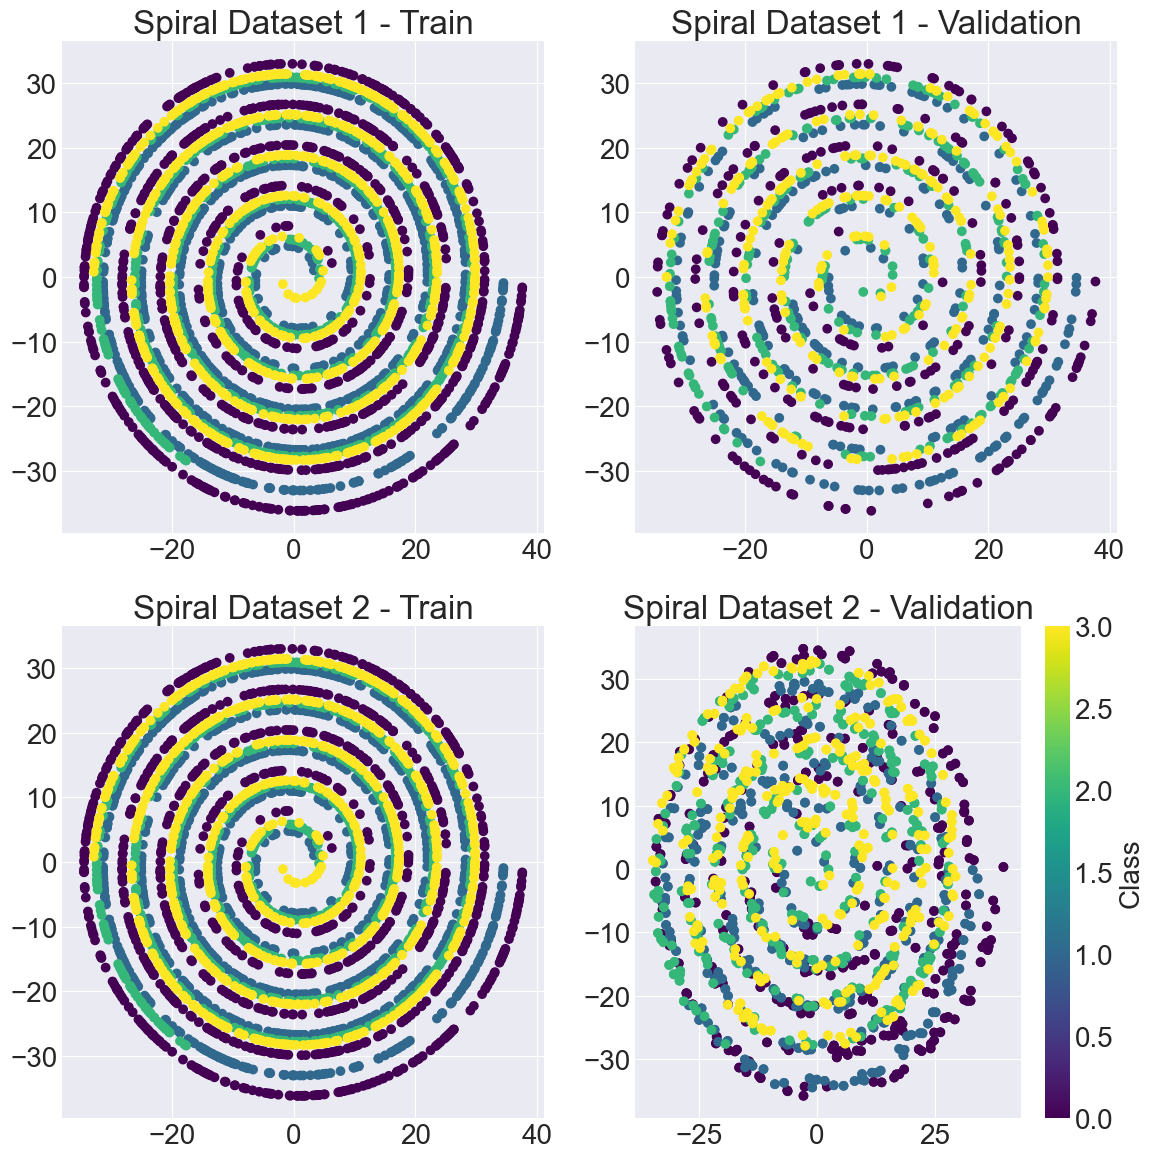

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].scatter(spiral_1_train[:, 0], spiral_1_train[:, 1], c=spiral_1_train_y, cmap='viridis')
axes[0, 0].set_title('Spiral Dataset 1 - Train')
axes[0, 1].scatter(spiral_1_val[:, 0], spiral_1_val[:, 1], c=spiral_1_val_y, cmap='viridis')
axes[0, 1].set_title('Spiral Dataset 1 - Validation')
axes[1, 0].scatter(spiral_2_train[:, 0], spiral_2_train[:, 1], c=spiral_2_train_y, cmap='viridis')
axes[1, 0].set_title('Spiral Dataset 2 - Train')
axes[1, 1].scatter(spiral_2_val[:, 0], spiral_2_val[:, 1], c=spiral_2_val_y, cmap='viridis')
axes[1, 1].set_title('Spiral Dataset 2 - Validation')
cbar = plt.colorbar(axes[1, 1].scatter(spiral_2_val[:, 0], spiral_2_val[:, 1], c=spiral_2_val_y, cmap='viridis'))
cbar.set_label('Class')
plt.tight_layout()
plt.show()

### Implementing KNN

Implementing the following methods in `knn.py`. Test relevant methods using the test code below.

- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.
- `accuracy(y, y_pred)`: Compute percent correct given true data labels `y` and algorithm predicted labels `y_pred`. 

In [4]:
from knn import KNN

#### Test: 1-KNN

In [5]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)
print(f'Accuracy with K=1 is {acc}')

Accuracy with K=1 is 1.0


#### Test: 2-KNN

In [6]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_val, k)
acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
print(f'Accuracy with K=2 is {acc:.2f}')

true_test_y = np.array([2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

print(f'The mismatches between the predicted class of validation samples with indices 750-900 and the expected values are\n{np.where(true_test_y != spiral_1_y_pred[750:900], 1, 0)}')

Accuracy with K=2 is 0.88
The mismatches between the predicted class of validation samples with indices 750-900 and the expected values are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


### Find the best `k`

- Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

In [7]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# spiral dataset 1
spiral_1_accuracies = []
for k in k_values:
    classifier = KNN(num_classes=n_classes)
    classifier.train(spiral_1_train, spiral_1_train_y)
    spiral_1_y_pred = classifier.predict(spiral_1_val, k)
    acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
    spiral_1_accuracies.append(acc)

# spiral dataset 2
spiral_2_accuracies = []
for k in k_values:
    classifier = KNN(num_classes=n_classes)
    classifier.train(spiral_2_train, spiral_2_train_y)
    spiral_2_y_pred = classifier.predict(spiral_2_val, k)
    acc = classifier.accuracy(y=spiral_2_val_y, y_pred=spiral_2_y_pred)
    spiral_2_accuracies.append(acc)

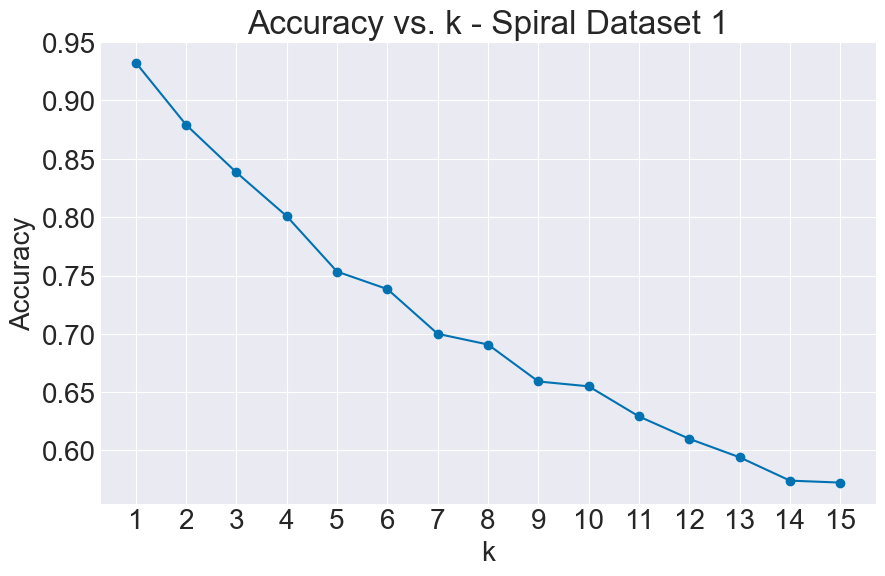

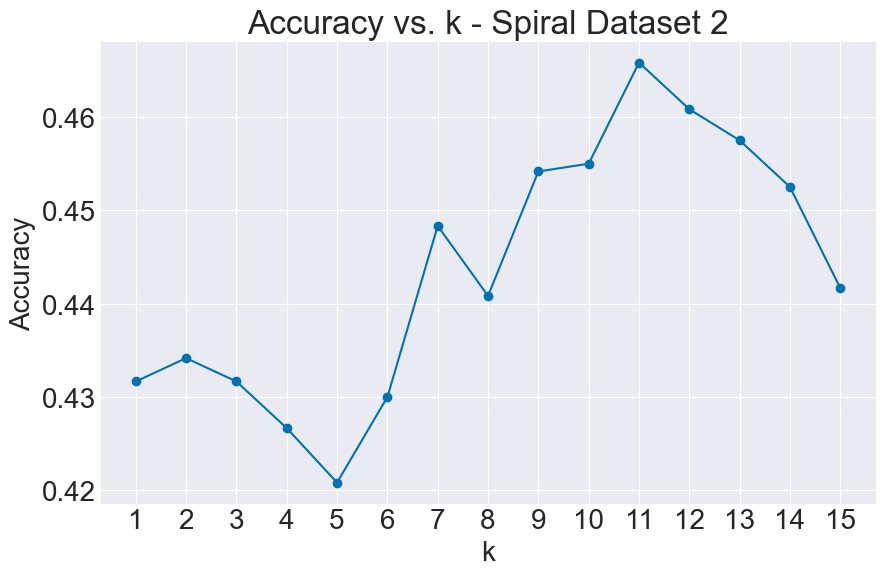

In [8]:
# spiral dataset 1
plt.figure(figsize=(10, 6))
plt.plot(k_values, spiral_1_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k - Spiral Dataset 1')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# spiral dataset 2
plt.figure(figsize=(10, 6))
plt.plot(k_values, spiral_2_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k - Spiral Dataset 2')
plt.grid(True)
plt.xticks(k_values)
plt.show()

### Visualize class boundaries

- Implementing `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, four discrete colors are used to represent each of the classes.

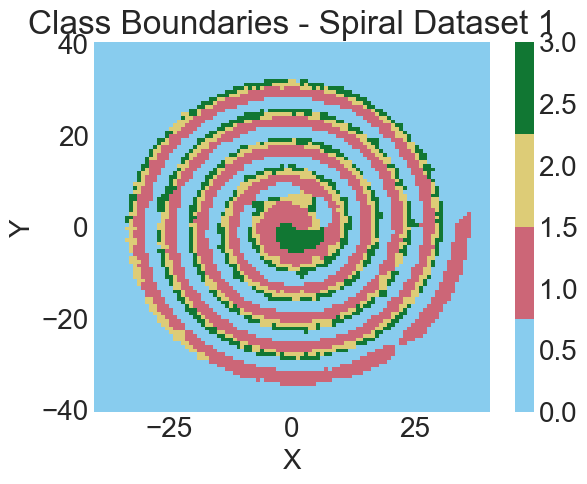

In [9]:
best_k_spiral_1 = 2
classifier_spiral_1 = KNN(num_classes=n_classes)
classifier_spiral_1.train(spiral_1_train, spiral_1_train_y)
n_sample_pts = 100
classifier_spiral_1.plot_predictions(best_k_spiral_1, n_sample_pts)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Class Boundaries - Spiral Dataset 1')
plt.show()

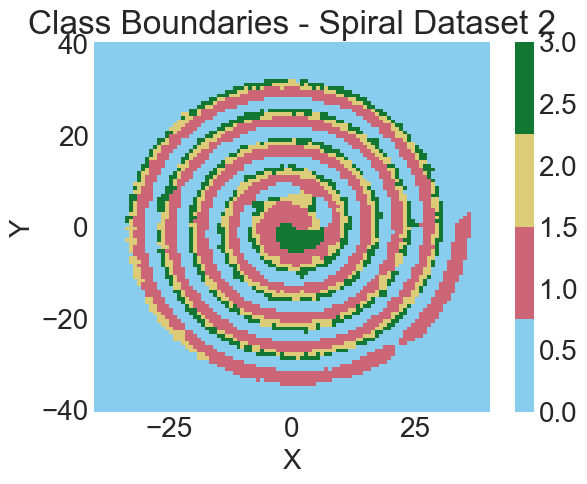

In [20]:
best_k_spiral_2 = 2
classifier_spiral_2 = KNN(num_classes=n_classes)
classifier_spiral_2.train(spiral_2_train, spiral_2_train_y)
n_sample_pts = 100
classifier_spiral_2.plot_predictions(best_k_spiral_2, n_sample_pts)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Class Boundaries - Spiral Dataset 2')
plt.show()

## Spam email preprocessing pipeline

Working with the **Enron email dataset**, a large datset consisting of ~34,000 emails. Enron is an energy company that famously went bankrupt in the early 2000s after committing massive accounting fraud (more info: https://en.wikipedia.org/wiki/Enron). The US government seized company emails during their investigation and they were released to the public much later and it is a commonly used dataset in machine learning. 

### Overall preprocessing strategy

### Determine email word frequency

Working with **development dataset** — a mini version of the full dataset that is much faster to work with. The enron dev datset has 2 ham emails and 3 spam emails. 

In [11]:
import email_preprocessor as epp

#### Test `count_words` and `find_top_words`

In [ ]:
word_freq, num_emails = epp.count_words(email_path='data/enron_dev/')

In [ ]:
print(f'{num_emails} emails in the datset.')

In [ ]:
top_words, top_counts = epp.find_top_words(word_freq)
print(f"{len(top_words)}/19 words.")
print(f"Top 2 words are\n{top_words[:2]}\nand they should be\n['subject', 'you']")

### Feature vectors based only on the top word counts

- Implement `make_feature_vectors`: Go back through the email folder structure and parse each email again. Now only count the frequency of words that are in the top $W$ word list. Keep track of whether each of these feature vectors are associated with a spam or not spam email.

In [ ]:
hard_code_words = ['subject', 'you', 'get', 'that', 'new', 'car', 'now', 'can', 'be', 'smart', 'love', 'ecards', 'christmas', 'tree', 'farm', 'pictures', 're', 'rankings', 'thank']
features, y = epp.make_feature_vectors(hard_code_words, num_emails, email_path='data/enron_dev/')

In [ ]:
firstSpamWordCounts = np.array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


print(f'Your matrix of features has shape:\n{features.shape}\nand it should be\n(5, 19).')
print(f'Your class label vector has shape:\n{y.shape}\nand it should be\n(5,).')
print(f"Make sure your features have 0's and 1's in every row")
print(features)
print('\nBelow, one number should be 3, the other should be 2.')
print(f'Number of emails of class 0: {np.sum(y == 0)}\nNumber of emails of class 1: {np.sum(y == 1)}')

inds = np.arange(len(features))
test_ind = inds[np.all(firstSpamWordCounts == features, axis=1)]
print(f'\nYour vector for 2958.2004-11-03.GP.spam.txt matches expected counts?\n{len(test_ind) == 1}\n')

### Make train and test splits of the dataset

Your matrix of features is for the entire dataset. We can't train the classifier on all these because then we won't have any emails left over to see how well your model's ability to discriminate spam/ham email generalizes to emails not seen during training!

Implement `make_train_test_sets` to divide the email features into a 80/20 train/test split (80% of data used to train the supervised learning model, 20% we withhold and use for testing / prediction).

In [ ]:
np.random.seed(0)
x_train, y_train, inds_train, x_test, y_test, inds_test = epp.make_train_test_sets(features, y)

In [ ]:
print('Shapes for train/test splits:')
print(f'Train {x_train.shape}, classes {y_train.shape}')
print(f'Test {x_test.shape}, classes {y_test.shape}')
print('\nThey should be:\nTrain (4, 19), classes (4,)\nTest (1, 19), classes (1,)')